In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


In [4]:
books = pd.read_csv("/content/Books.csv")
users = pd.read_csv("/content/Users.csv")
ratings = pd.read_csv("/content/Ratings.csv")

In [12]:
books.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...


In [13]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [52]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [15]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [16]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [17]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [18]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

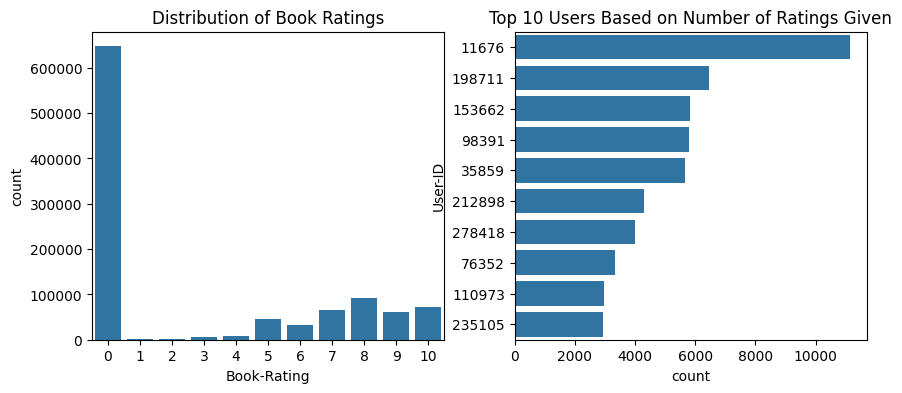

In [62]:
# Visualization of Data Distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Book-Rating', data=complete_df)
plt.title('Distribution of Book Ratings')

plt.subplot(1, 2, 2)
sns.countplot(y='User-ID', data=complete_df, order=complete_df['User-ID'].value_counts().index[:10])
plt.title('Top 10 Users Based on Number of Ratings Given')
plt.show()


In [19]:
ratings_with_book_titles = ratings.merge(books,on='ISBN')

In [20]:
complete_df = ratings_with_book_titles.merge(users.drop("Age", axis=1), on="User-ID")
complete_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa"
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa"
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa"
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa"
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa"


In [21]:
complete_df['Location'] = complete_df['Location'].str.split(',').str[-1].str.strip()

In [22]:
complete_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,usa


In [24]:
# Select user IDs with more than 200 book ratings
min_ratings_threshold = 200

# Count book ratings per user
num_ratings_per_user = complete_df.groupby('User-ID')['Book-Rating'].count()

# Filter users with more than the minimum threshold
knowledgeable_user_ids = num_ratings_per_user[num_ratings_per_user > min_ratings_threshold].index

In [25]:
# Filter ratings from knowledgeable users
knowledgeable_user_ratings = complete_df[complete_df['User-ID'].isin(knowledgeable_user_ids)]

In [26]:
min_ratings_count_threshold=50
rating_counts= knowledgeable_user_ratings.groupby('Book-Title').count()['Book-Rating']
popular_books = rating_counts[rating_counts >= min_ratings_count_threshold].index

In [27]:
final_ratings =  knowledgeable_user_ratings[knowledgeable_user_ratings['Book-Title'].isin(popular_books)]

In [63]:
#Creating Pivot table
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID'
                          ,values='Book-Rating')
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [29]:
pt.fillna(0,inplace=True)
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


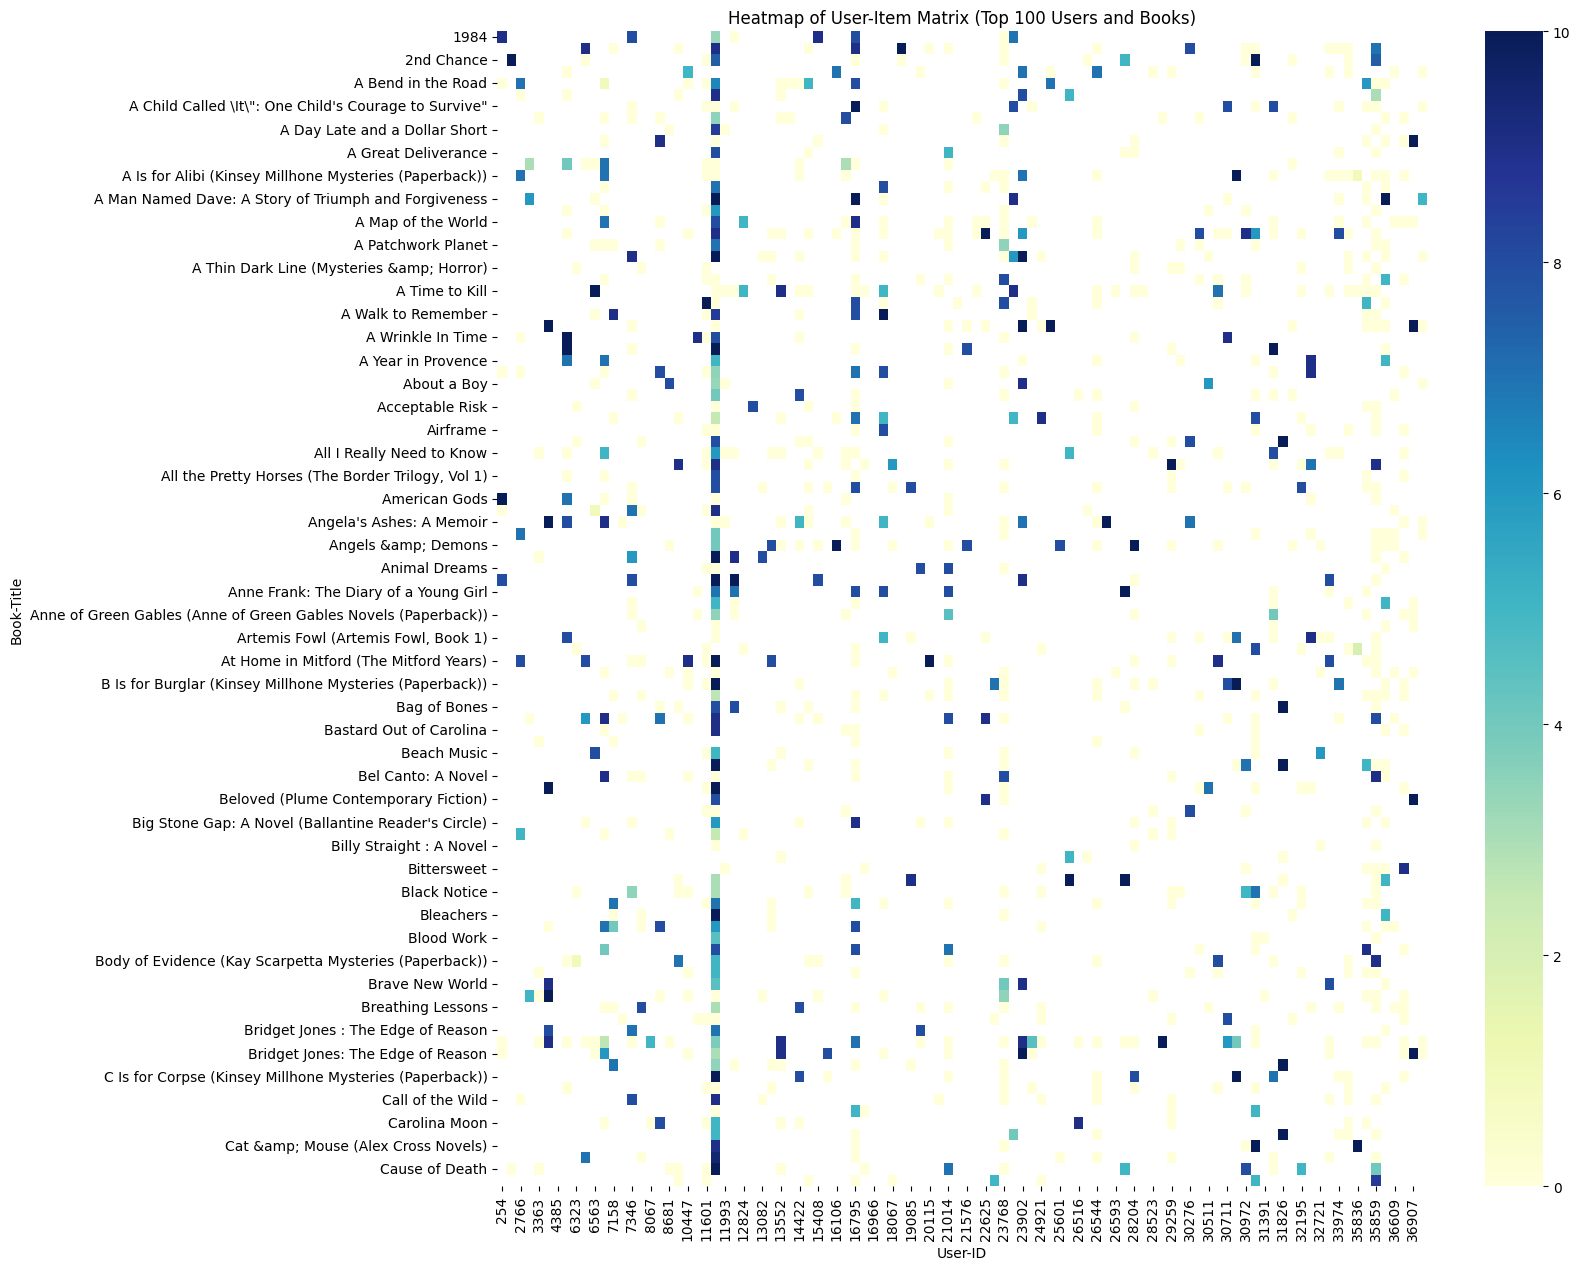

In [64]:
# Visualization of User-Item Matrix
plt.figure(figsize=(15, 15))
sns.heatmap(pt.iloc[:100, :100], cmap='YlGnBu')
plt.title('Heatmap of User-Item Matrix (Top 100 Users and Books)')
plt.show()

### Aplying the Cosine similarity to get similar recommendation of a particular genre.


In [30]:
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
similarity_score = cosine_similarity(pt)

In [32]:
def recommend(book_name):
    index = np.where(pt.index==book_name)[0][0]
    similar_books = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1], reverse=True)[1:6]

    data = []

    for i in similar_books:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)
    return data

In [33]:
recommend("A Walk to Remember")

[['The Rescue',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446610399.01.MZZZZZZZ.jpg'],
 ['Nights in Rodanthe',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446531332.01.MZZZZZZZ.jpg'],
 ['The Notebook',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446605239.01.MZZZZZZZ.jpg'],
 ['Granny Dan',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0440224829.01.MZZZZZZZ.jpg'],
 ['A Bend in the Road',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446527785.01.MZZZZZZZ.jpg']]

In [34]:
recommend("The Fourth Hand")

[['A Prayer for Owen Meany',
  'John Irving',
  'http://images.amazon.com/images/P/0345361792.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg'],
 ['Good Omens',
  'Neil Gaiman',
  'http://images.amazon.com/images/P/0441003257.01.MZZZZZZZ.jpg'],
 ['The Burden of Proof',
  'Scott Turow',
  'http://images.amazon.com/images/P/0446360589.01.MZZZZZZZ.jpg'],
 ["I Know This Much Is True (Oprah's Book Club)",
  'Wally Lamb',
  'http://images.amazon.com/images/P/0060391626.01.MZZZZZZZ.jpg']]

In [35]:
recommend("Prodigal Summer")

[['Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
  'ROBERT PIRSIG',
  'http://images.amazon.com/images/P/0553277472.01.MZZZZZZZ.jpg'],
 ['The Poisonwood Bible',
  'Barbara Kingsolver',
  'http://images.amazon.com/images/P/0060175400.01.MZZZZZZZ.jpg'],
 ['Love in the Time of Cholera (Penguin Great Books of the 20th Century)',
  'Gabriel Garcia Marquez',
  'http://images.amazon.com/images/P/0140119906.01.MZZZZZZZ.jpg'],
 ["The Bonesetter's Daughter",
  'Amy Tan',
  'http://images.amazon.com/images/P/0399146431.01.MZZZZZZZ.jpg'],
 ['The Fourth Hand',
  'John Irving',
  'http://images.amazon.com/images/P/0345449347.01.MZZZZZZZ.jpg']]

In [58]:
recommend("Harry Potter and the Goblet of Fire (Book 4)")

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Chamber of Secrets (Book 2)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg']]

## **Applying SVD algorithm (Singular Value Decomposition)**


In [37]:
# Install Surprise library
!pip install scikit-surprise

In [38]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
# Define the rating scale
reader = Reader(rating_scale=(0, 10))

# Load the data into Surprise's dataset format
data = Dataset.load_from_df(complete_df[['User-ID', 'Book-Title', 'Book-Rating']], reader)

# Split the dataset into training and testing sets
train_set, test_set = train_test_split(data, test_size=0.20, random_state=42)

# Define the SVD algorithm
model = SVD()

# Train the algorithm on the training set
model.fit(train_set)

# Make predictions on the test set
predictions = model.test(test_set)

# Evaluate the model
accuracy.rmse(predictions)


RMSE: 3.5118


3.5117533820442746

In [41]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Define the rating scale
reader = Reader(rating_scale=(0, 10))

# Load the data into Surprise's dataset format
data = Dataset.load_from_df(complete_df[['User-ID', 'Book-Title', 'Book-Rating']], reader)

# Split the dataset into training and testing sets
train_set, test_set = train_test_split(data, test_size=0.20, random_state=42)

# Define the SVD algorithm
model = SVD()

# Train the algorithm on the training set
model.fit(train_set)

# Make predictions on the test set
predictions = model.test(test_set)

# Evaluate the model
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")


RMSE: 3.5199
MAE:  2.8039
Root Mean Squared Error: 3.5198564908275127
Mean Absolute Error: 2.80388593664145


In [46]:
import numpy as np

# Define a function to calculate NMAE
def calculate_nmae(predictions):
    true_ratings = np.array([pred.r_ui for pred in predictions])
    predicted_ratings = np.array([pred.est for pred in predictions])
    mae = np.mean(np.abs(true_ratings - predicted_ratings))
    nmae = mae / (np.max(true_ratings) - np.min(true_ratings))
    return nmae

# Calculate NMAE on the predictions
nmae = calculate_nmae(predictions)

print(f"Normalized Mean Absolute Error: {nmae}")


Normalized Mean Absolute Error: 0.280388593664145


In [44]:
from collections import defaultdict

def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision-K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall-K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls


In [47]:
precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=3.5)

# Precision and recall can then be averaged over all users
print(f"Precision-k: {sum(prec for prec in precisions.values()) / len(precisions)}")
print(f"Recall-k: {sum(rec for rec in recalls.values()) / len(recalls)}")


Precision-k: 0.799178913680898
Recall-k: 0.5989094498909174


In [49]:
def recommend_books(user_id, n=10):
    # List all unique book titles
    all_books = complete_df['Book-Title'].unique()

    # Remove books already rated by the user
    rated_books = complete_df[complete_df['User-ID'] == user_id]['Book-Title'].values
    books_to_predict = [book for book in all_books if book not in rated_books]

    # Predict ratings for remaining books
    predictions = []
    for book in books_to_predict:
        pred = model.predict(user_id, book)
        predictions.append((book, pred.est))

    # Sort predictions by estimated rating
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Get top N recommendations
    top_n = predictions[:n]

    return top_n

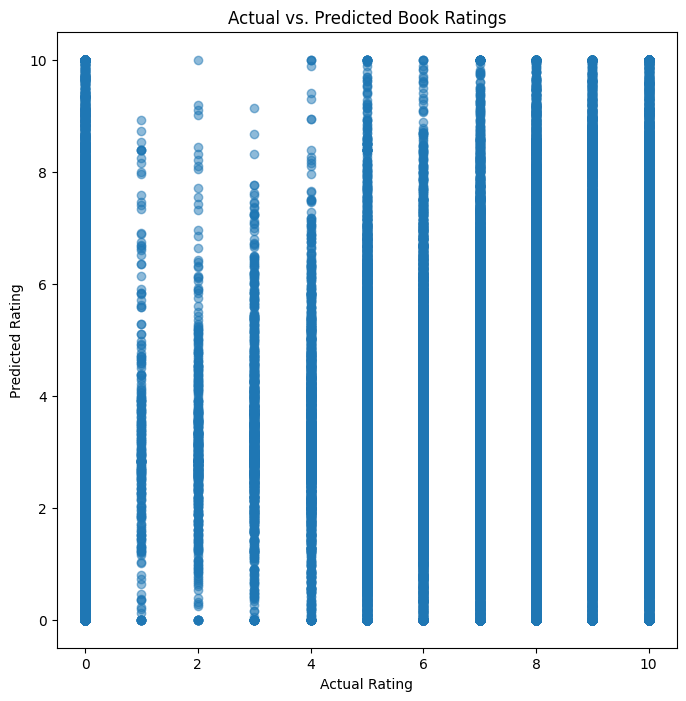

In [60]:
actual = np.array([pred.r_ui for pred in predictions])
predicted = np.array([pred.est for pred in predictions])

plt.figure(figsize=(8, 8))
plt.scatter(actual, predicted, alpha=0.5)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Book Ratings')
plt.show()


# **Recommending** top 10 books for a specific user

In [54]:
user_id = 42
recommended_books = recommend_books(user_id)
print(f"Top 10 recommended books for user {user_id}:")
for i, (title, _) in enumerate(recommended_books, start=1):
    print(f"{i}. {title}")

Top 10 recommended books for user 42:
1. Free
2. Ishmael: An Adventure of the Mind and Spirit
3. Interpreter of Maladies
4. Love You Forever
5. My Antonia
6. The Hobbit: or There and Back Again
7. Falling Up
8. Green Eggs and Ham (I Can Read It All by Myself Beginner Books)
9. Der Kleine Hobbit
10. The Stand (The Complete and Uncut Edition)


©Developped by,
Mahatir Ahmed Tusher, Saket Choudary Kongara,
Gangavarapu Sreeram &
Sheikha Farooq Batha.